# Libraries

In [140]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importing Data

In [141]:
df=pd.read_csv("heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Graphical Representation of Data

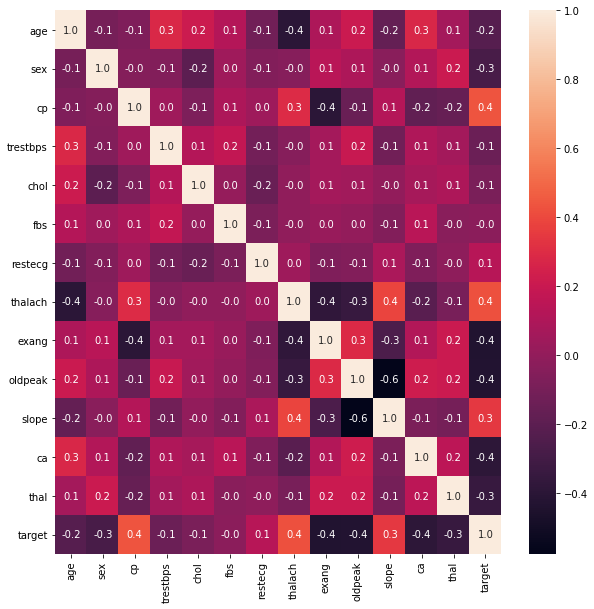

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [143]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

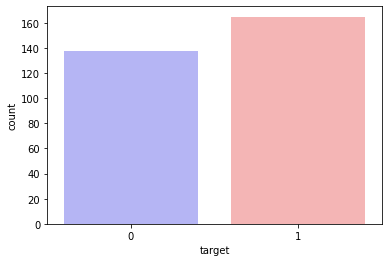

In [144]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

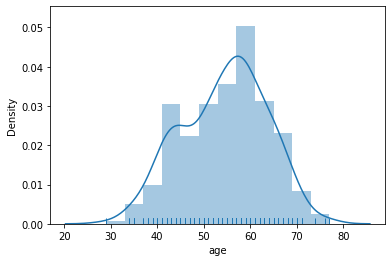

In [145]:
sns.distplot(df['age'],rug=True)
plt.show()

In [146]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

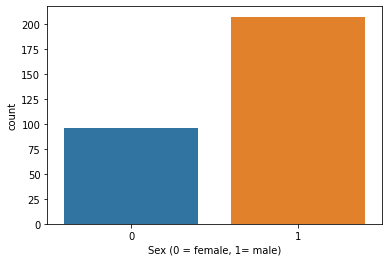

In [147]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

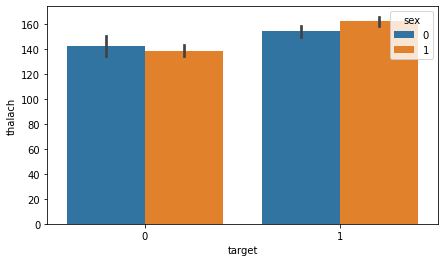

In [148]:
plt.figure(num=None, figsize=(7, 4))

sns.barplot(y='thalach', x='target',hue='sex', data=df)
plt.show()

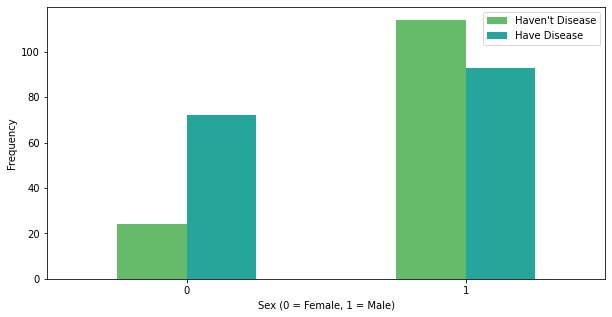

In [149]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

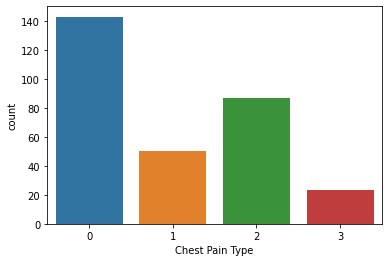

In [150]:
sns.countplot(x='cp', data=df)
plt.xlabel('Chest Pain Type')
plt.show()

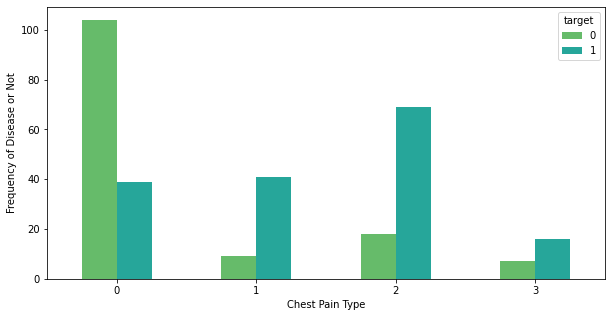

In [151]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['#66bb6a','#26a69a' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

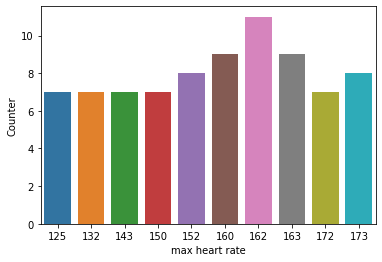

In [152]:
sns.barplot(x=df.thalach.value_counts()[:10].index,y=df.thalach.value_counts()[:10].values)
plt.xlabel('max heart rate')
plt.ylabel('Counter')
plt.show()

# Dummie Variables

In [153]:
chestPain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
df=pd.concat([df,chestPain],axis=1)
df.drop(['cp'],axis=1,inplace=True)
sp=pd.get_dummies(df['slope'],prefix='slope')
th=pd.get_dummies(df['thal'],prefix='thal')
frames=[df,sp,th]
df=pd.concat(frames,axis=1)
df.drop(['slope','thal'],axis=1,inplace=True)

In [154]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Spliting Data 

In [155]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [157]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Multiple Algorithms

In [158]:
#LogisticRegression
logiReg=LogisticRegression(random_state=0)
logiReg.fit(X_train,y_train)
logiRegPred=logiReg.predict(X_test)
logiRegAcu=accuracy_score(y_test, logiRegPred)

#SVM classifier
svc=SVC(kernel='linear',random_state=0, probability =True)
svc.fit(X_train,y_train)
svcPred=svc.predict(X_test)
svcAcu=accuracy_score(y_test, svcPred)

#Bayes
bayes=GaussianNB()
bayes.fit(X_train,y_train)
bayesPred=bayes.predict(X_test)
bayesAcu=accuracy_score(bayesPred,y_test)

#SGDClassifier
sgd_class = SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
sgd_class.fit(X_train, y_train)
sgd_pred = sgd_class.predict(X_test)
sgd_accu = accuracy_score(sgd_pred, y_test)

#SVM regressor
svcReg=SVC(kernel='rbf',probability=True)
svcReg.fit(X_train,y_train)
svcRedPred=svcReg.predict(X_test)
svcRedAcu=accuracy_score(y_test, svcRedPred)

#RandomForest
randomForest=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
randomForest.fit(X_train,y_train)
randomForestPred=randomForest.predict(X_test)
randomForestAcu=accuracy_score(randomForestPred,y_test)

# DecisionTree Classifier
dTree=DecisionTreeClassifier(criterion='entropy',random_state=1)
dTree.fit(X_train,y_train)
dTreePred=dTree.predict(X_test)
dTreeAcu=accuracy_score(dTreePred,y_test)

#KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knnPred=knn.predict(X_test)
knnAcu=accuracy_score(knnPred,y_test)


# confusion matrix

In [159]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn import metrics


In [160]:
lr_conf_matrix = confusion_matrix(y_test, logiRegPred)
svc_conf_matrix = confusion_matrix(y_test, svcPred)
svcReg_conf_matrix = confusion_matrix(y_test, svcRedPred)
knn_conf_matrix = confusion_matrix(y_test, knnPred)
dTree_conf_matrix = confusion_matrix(y_test, dTreePred)
randomForest_conf_matrix = confusion_matrix(y_test, randomForestPred)
bayes_conf_matrix = confusion_matrix(y_test, bayesPred)

In [161]:
print(f'Logistic Regression\n{lr_conf_matrix}')
print(f'SVC\n{svc_conf_matrix}')
print(f'SVC regression\n{svcReg_conf_matrix}')
print(f'KNN\n{knn_conf_matrix}')
print(f'Decision Tree\n{dTree_conf_matrix}')
print(f'Random Forest{randomForest_conf_matrix}')
print(f'Bayes\n{bayes_conf_matrix}')

Logistic Regression
[[21  6]
 [ 3 31]]
SVC
[[20  7]
 [ 4 30]]
SVC regression
[[21  6]
 [ 2 32]]
KNN
[[21  6]
 [ 5 29]]
Decision Tree
[[22  5]
 [ 8 26]]
Random Forest[[23  4]
 [ 7 27]]
Bayes
[[21  6]
 [ 3 31]]


# accuracy, specification, sensitivity, precision AUC, f1 score, and ROC

In [162]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from inspect import signature

In [163]:
probs = logiReg.predict_proba(X_test)

In [164]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

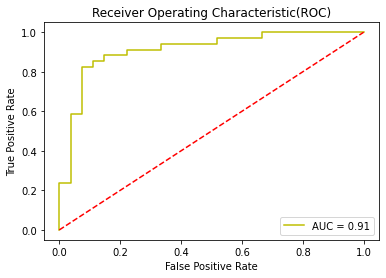

In [165]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [166]:
y_pred = logiReg.predict(X_test)

In [167]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))


recall score:  0.9117647058823529
precision score:  0.8378378378378378
f1 score:  0.8732394366197184
accuracy:  0.8524590163934426


In [168]:
total = sum(sum(lr_conf_matrix))
accuracy=(lr_conf_matrix[0,0]+lr_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = lr_conf_matrix[0,0]/(lr_conf_matrix[0,0]+lr_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = lr_conf_matrix[1,1]/(lr_conf_matrix[1,0]+lr_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8524590163934426
Sensitivity :  0.7777777777777778
Specificity :  0.9117647058823529


In [169]:
probs = svc.predict_proba(X_test)

In [170]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

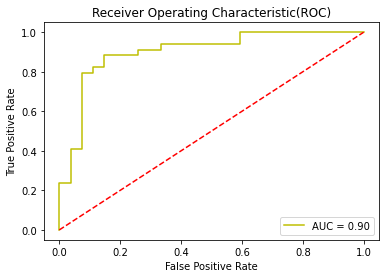

In [171]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [172]:
y_pred = svc.predict(X_test)

In [173]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.8823529411764706
precision score:  0.8108108108108109
f1 score:  0.8450704225352113
accuracy:  0.819672131147541


In [174]:
total = sum(sum(svc_conf_matrix))
accuracy=(svc_conf_matrix[0,0]+svc_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = svc_conf_matrix[0,0]/(svc_conf_matrix[0,0]+svc_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = svc_conf_matrix[1,1]/(svc_conf_matrix[1,0]+svc_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.819672131147541
Sensitivity :  0.7407407407407407
Specificity :  0.8823529411764706


In [175]:
probs = bayes.predict_proba(X_test)

In [176]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

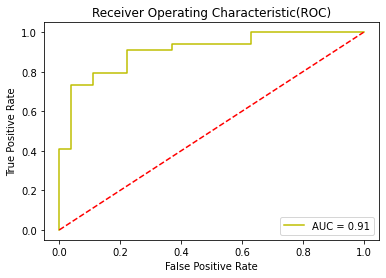

In [177]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [178]:
y_pred = bayes.predict(X_test)

In [179]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.9117647058823529
precision score:  0.8378378378378378
f1 score:  0.8732394366197184
accuracy:  0.8524590163934426


In [180]:
total = sum(sum(bayes_conf_matrix))
accuracy=(bayes_conf_matrix[0,0]+bayes_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = bayes_conf_matrix[0,0]/(bayes_conf_matrix[0,0]+bayes_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = bayes_conf_matrix[1,1]/(bayes_conf_matrix[1,0]+bayes_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8524590163934426
Sensitivity :  0.7777777777777778
Specificity :  0.9117647058823529


In [181]:
probs = svcReg.predict_proba(X_test)

In [182]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

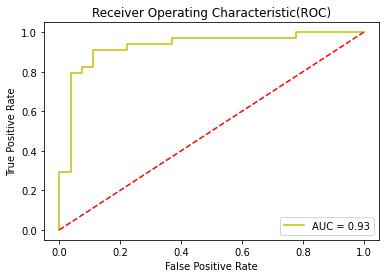

In [183]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [184]:
y_pred = svcReg.predict(X_test)

In [185]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.9411764705882353
precision score:  0.8421052631578947
f1 score:  0.8888888888888888
accuracy:  0.8688524590163934


In [186]:
total = sum(sum(svcReg_conf_matrix))
accuracy=(svcReg_conf_matrix[0,0]+svcReg_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = svcReg_conf_matrix[0,0]/(svcReg_conf_matrix[0,0]+svcReg_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = svcReg_conf_matrix[1,1]/(svcReg_conf_matrix[1,0]+svcReg_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.8688524590163934
Sensitivity :  0.7777777777777778
Specificity :  0.9411764705882353


In [187]:
probs = randomForest.predict_proba(X_test)

In [188]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

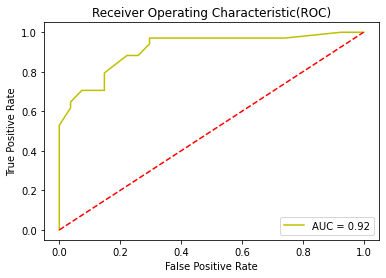

In [189]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [190]:
y_pred = randomForest.predict(X_test)

In [191]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.7941176470588235
precision score:  0.8709677419354839
f1 score:  0.8307692307692308
accuracy:  0.819672131147541


In [192]:
total = sum(sum(randomForest_conf_matrix))
accuracy=(randomForest_conf_matrix[0,0]+randomForest_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = randomForest_conf_matrix[0,0]/(randomForest_conf_matrix[0,0]+randomForest_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = randomForest_conf_matrix[1,1]/(randomForest_conf_matrix[1,0]+randomForest_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.819672131147541
Sensitivity :  0.8518518518518519
Specificity :  0.7941176470588235


In [193]:
probs = dTree.predict_proba(X_test)

In [194]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

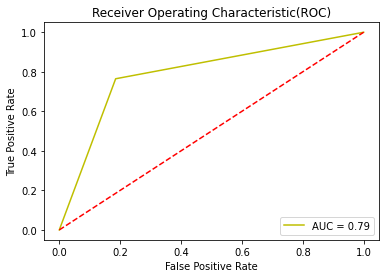

In [195]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [196]:
y_pred = dTree.predict(X_test)

In [197]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.7647058823529411
precision score:  0.8387096774193549
f1 score:  0.7999999999999999
accuracy:  0.7868852459016393


In [198]:
total = sum(sum(dTree_conf_matrix))
accuracy=(dTree_conf_matrix[0,0]+dTree_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = dTree_conf_matrix[0,0]/(dTree_conf_matrix[0,0]+dTree_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = dTree_conf_matrix[1,1]/(dTree_conf_matrix[1,0]+dTree_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7868852459016393
Sensitivity :  0.8148148148148148
Specificity :  0.7647058823529411


In [199]:
probs = knn.predict_proba(X_test)

In [200]:
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)
roc_auc = auc(fpr, tpr)

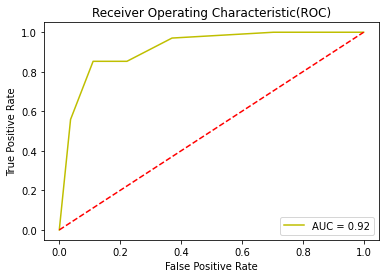

In [201]:
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [202]:
y_pred = knn.predict(X_test)

In [203]:
print("recall score: ", recall_score(y_test, y_pred))
print("precision score: ", precision_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

recall score:  0.8529411764705882
precision score:  0.8285714285714286
f1 score:  0.8405797101449276
accuracy:  0.819672131147541


In [204]:
total = sum(sum(knn_conf_matrix))
accuracy=(knn_conf_matrix[0,0]+knn_conf_matrix[1,1])/total
print ('Accuracy : ', accuracy)
sensitivity = knn_conf_matrix[0,0]/(knn_conf_matrix[0,0]+knn_conf_matrix[0,1])
print('Sensitivity : ', sensitivity )
specificity = knn_conf_matrix[1,1]/(knn_conf_matrix[1,0]+knn_conf_matrix[1,1])
print('Specificity : ', specificity)

Accuracy :  0.819672131147541
Sensitivity :  0.7777777777777778
Specificity :  0.8529411764705882


# Accuracy Score

# models acc

In [205]:
print('LogisticRegression Accuracy:\t',logiRegAcu)
print('SVM Regressor Accuracy:\t\t',svcRedAcu)
print('RandomForest Accuracy:\t\t',randomForestAcu)
print('DecisionTree Accuracy:\t\t',dTreeAcu)
print('KNN Accuracy:\t\t\t',knnAcu)
print('SVM Classifier Accuracy:\t',svcAcu)
print('Bayes Accuracy:\t\t\t',bayesAcu)
print('SGD Accuracy:\t\t\t', sgd_accu)

LogisticRegression Accuracy:	 0.8524590163934426
SVM Regressor Accuracy:		 0.8688524590163934
RandomForest Accuracy:		 0.819672131147541
DecisionTree Accuracy:		 0.7868852459016393
KNN Accuracy:			 0.819672131147541
SVM Classifier Accuracy:	 0.819672131147541
Bayes Accuracy:			 0.8524590163934426
SGD Accuracy:			 0.7868852459016393


# Comparison Graph

Text(0.5, 1.0, 'Model Accracy')

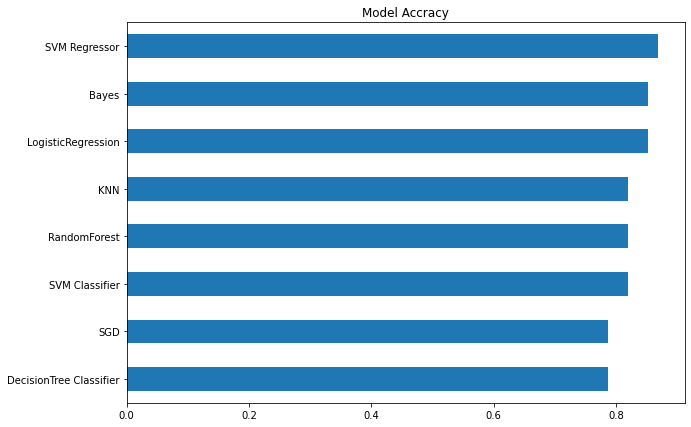

In [206]:
modelAccuracy = pd.Series(data=[logiRegAcu,svcAcu,bayesAcu,svcRedAcu,randomForestAcu,dTreeAcu,knnAcu,sgd_accu], 
index=['LogisticRegression','SVM Classifier','Bayes','SVM Regressor',
'RandomForest','DecisionTree Classifier','KNN','SGD'])
fig= plt.figure(figsize=(10,7))
modelAccuracy.sort_values().plot.barh()
plt.title('Model Accracy')